In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os 
import pandas as pd



IMPORTAZIONE E STAMPA DEL DATAFRAME

In [2]:
file_path = "owid-covid-data.csv"
df = pd.read_csv(file_path)
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388915,ZWE,Africa,Zimbabwe,2024-03-20,266359.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
388916,ZWE,Africa,Zimbabwe,2024-03-21,266359.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
388917,ZWE,Africa,Zimbabwe,2024-03-22,266359.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
388918,ZWE,Africa,Zimbabwe,2024-03-23,266359.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


1 ) VERIFICA DIMENSIONI DATASET E RELATIVI METADATI

In [3]:
df.shape

(388920, 67)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388920 entries, 0 to 388919
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    388920 non-null  object 
 1   continent                                   370329 non-null  object 
 2   location                                    388920 non-null  object 
 3   date                                        388920 non-null  object 
 4   total_cases                                 350041 non-null  float64
 5   new_cases                                   377974 non-null  float64
 6   new_cases_smoothed                          376744 non-null  float64
 7   total_deaths                                327775 non-null  float64
 8   new_deaths                                  378290 non-null  float64
 9   new_deaths_smoothed                         377060 non-null  float64
 

In [5]:
df.columns
list(df.columns)


['iso_code',
 'continent',
 'location',
 'date',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million',
 'total_tests',
 'new_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'positive_rate',
 'tests_per_case',
 'tests_units',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'total_boosters',
 'new_vaccinations',
 'new_vaccinations_smoothed',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'peo

2 ) NUMERO CASI TOTALI PER CONTINENTE


In [6]:
df.groupby("continent")["new_cases"].sum()


continent
Africa            13141439.0
Asia             301451451.0
Europe           252417184.0
North America    124530677.0
Oceania           14814266.0
South America     68844492.0
Name: new_cases, dtype: float64

2.1) LOCAZIONI CHE NEL DATASET NON APPARTENGONO AD ALCUN CONTINENTE


In [7]:
# In questo df avremo 18531 righe senza un continente associato 
df.continent.isna().value_counts()


continent
False    370329
True      18591
Name: count, dtype: int64

3 ) SEMPRE RIGUARDO I CASI TOTALI, SI CHIEDE DI SCRIVERE DEL CODICE CHE, DATE DUE VARIABILI CONTENENTI I NOMI DI CONTINENTI, NE CONFRONTI I SEGUENTI RELATIVI DESCRITTORI STATISTICI: VALORE MASSIMO, MEDIA, E PERCENTUALE RISPETTO AL NUMERO DEI CASI TOTALI NEL MONDO (CALCOLATI ANCHE SULLE LOCAZIONI SENZA INDICAZIONE DI CONTINENTE);le rispetto al numero dei casi totali nel mondo (calcolati anche sulle locazioni senza indicazione di continente);

In [8]:
# Variabile 1
df_oceania = df[df.continent == 'Oceania']
df_oceania

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
6164,ASM,Oceania,American Samoa,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,73.74,NaN,44295.0,NaN,NaN,NaN,NaN
6165,ASM,Oceania,American Samoa,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,73.74,NaN,44295.0,NaN,NaN,NaN,NaN
6166,ASM,Oceania,American Samoa,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,73.74,NaN,44295.0,NaN,NaN,NaN,NaN
6167,ASM,Oceania,American Samoa,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,73.74,NaN,44295.0,NaN,NaN,NaN,NaN
6168,ASM,Oceania,American Samoa,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,73.74,NaN,44295.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382738,WLF,Oceania,Wallis and Futuna,2024-03-20,3550.0,0.0,0.0,8.0,0.0,0.0,...,NaN,NaN,NaN,79.94,NaN,11596.0,NaN,NaN,NaN,NaN
382739,WLF,Oceania,Wallis and Futuna,2024-03-21,3550.0,0.0,0.0,8.0,0.0,0.0,...,NaN,NaN,NaN,79.94,NaN,11596.0,NaN,NaN,NaN,NaN
382740,WLF,Oceania,Wallis and Futuna,2024-03-22,3550.0,0.0,0.0,8.0,0.0,0.0,...,NaN,NaN,NaN,79.94,NaN,11596.0,NaN,NaN,NaN,NaN
382741,WLF,Oceania,Wallis and Futuna,2024-03-23,3550.0,0.0,0.0,8.0,0.0,0.0,...,NaN,NaN,NaN,79.94,NaN,11596.0,NaN,NaN,NaN,NaN


In [9]:
# Variabile 2
df_europe = df[df.continent == 'Europe']
df_europe

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
3082,ALB,Europe,Albania,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,51.2,NaN,2.89,78.57,0.795,2842318.0,NaN,NaN,NaN,NaN
3083,ALB,Europe,Albania,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,51.2,NaN,2.89,78.57,0.795,2842318.0,NaN,NaN,NaN,NaN
3084,ALB,Europe,Albania,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,51.2,NaN,2.89,78.57,0.795,2842318.0,NaN,NaN,NaN,NaN
3085,ALB,Europe,Albania,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,51.2,NaN,2.89,78.57,0.795,2842318.0,NaN,NaN,NaN,NaN
3086,ALB,Europe,Albania,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,51.2,NaN,2.89,78.57,0.795,2842318.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381197,OWID_WLS,Europe,Wales,2023-07-08,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3170000.0,NaN,NaN,NaN,NaN
381198,OWID_WLS,Europe,Wales,2023-07-09,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3170000.0,NaN,NaN,NaN,NaN
381199,OWID_WLS,Europe,Wales,2023-07-10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3170000.0,NaN,NaN,NaN,NaN
381200,OWID_WLS,Europe,Wales,2023-07-11,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3170000.0,NaN,NaN,NaN,NaN


In [10]:
max_europe = df_europe.groupby('location')['total_cases'].max().sum()
max_oceania = df_oceania.groupby('location')['total_cases'].max().sum()

In [11]:
mean_europe = df_europe['total_cases'].mean().round(2)
mean_oceania = df_oceania['total_cases'].mean().round(2)

In [12]:
pulizia_df = df.dropna(subset=['location', 'total_cases']) # Pulizia da valori nulli  per colonne location e  total_cases
total_world = pulizia_df['new_cases'].sum() # creazione variabile casi totale nel mondo
percent_europe = (df_europe['new_cases'].sum() / total_world) * 100


In [13]:
percent_oceania = (df_oceania['new_cases'].sum() / total_world) * 100
percent_oceania.round(2)

0.45

In [14]:
# Creazione DF informativo Europa
info_europe = pd.DataFrame({
    'Continent': 'Europe',
    'Max Total': [max_europe],
    'Mean': [mean_europe],
    'Percentage': [percent_europe]
}).round(2)


In [15]:
# Creazione DF informativo Oceania
info_oceania = pd.DataFrame({
    'Continent': 'Oceania',
    'Max Total': [max_oceania],
    'Mean': [mean_oceania],
    'Percentage': [percent_oceania]
}).round(2)


In [16]:
# Unione dei 2 DF 
unione_df = pd.concat([info_europe, info_oceania]).reset_index(drop=True)
unione_df

,Continent,Max Total,Mean,Percentage
0,Europe,252417184.0,2679982.58,7.68
1,Oceania,14814237.0,367118.54,0.45


<Axes: xlabel='Continent', ylabel='Max Total'>

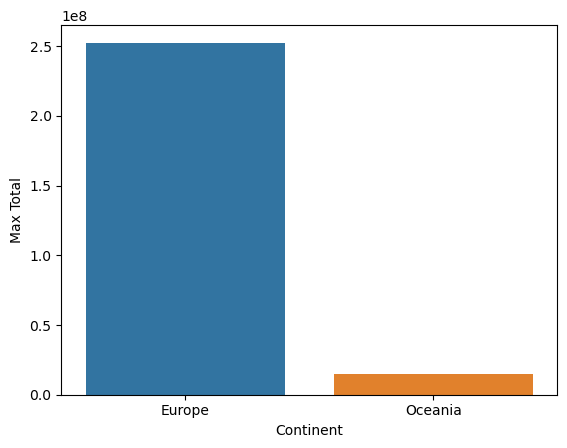

In [17]:
# Grafico confronto numero massimo casi totali
sns.barplot(data = unione_df, x='Continent', y='Max Total')

<Axes: xlabel='Continent', ylabel='Mean'>

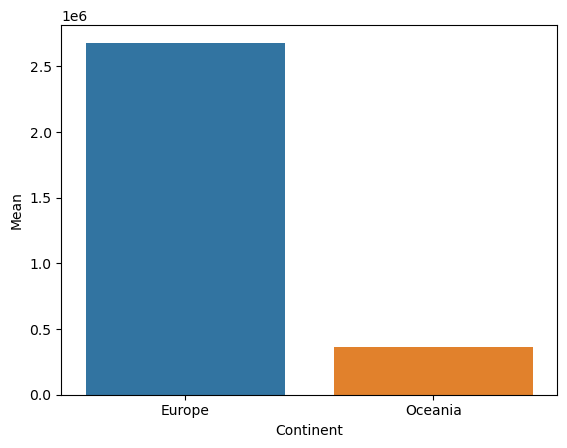

In [18]:
# Grafico confronto media casi totali

sns.barplot(data = unione_df, x='Continent', y='Mean')

<Axes: xlabel='Continent', ylabel='Percentage'>

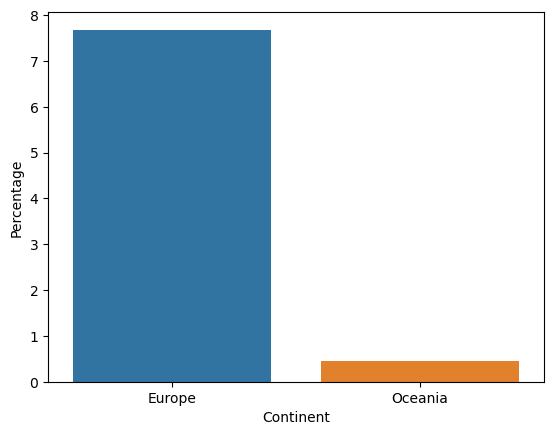

In [19]:
# Grafico confronto percentuale casi totali

sns.barplot(data = unione_df, x='Continent', y='Percentage')

In [20]:
# Il numero dei casi totali per le locazioni senza continente, è un dato sproporzionato in quanto in queste locazioni vengono cumulati i dati per il totale di tutti quanti gli elementi 
# sotto elencati alla cella successiva.
nocontinent=df.loc[df.continent.isna()]
nocontinent.new_cases.sum()

2509990071.0

In [21]:
nocontinent.location.value_counts()

location
Asia                   1553
Europe                 1553
European Union         1553
High income            1553
Lower middle income    1553
Upper middle income    1553
World                  1553
North America          1551
Oceania                1546
Africa                 1541
Low income             1541
South America          1541
Name: count, dtype: int64

In [22]:
# somma di tutti i casi comprese le locazioni senza continente
df.new_cases.sum()

3285189580.0

4 ) 
SELEZIONARE I DATI RELATIVI ALL'ITALIA NEL 2022, E MOSTRARE CON UN GRAFICO ADEGUATO L'EVOLUZIONE DEI CASI TOTALI RISPETTO ALLA DATA. MOSTRARE POI CON UN GRAFICO ADEGUATO IL NUMERO DI NUOVI CASI RISPETTO ALLA DATA (FILTRARE I DATI SE NECESSARIO). MOSTRARE INFINE UN GRAFICO CHE MOSTRA L'ANDAMENTO DELLA SOMMA CUMULATIVA DEI NUOVI CASI DEL 2022, E COMMENTARE SE CI SONO SIMILARITÀ CON L'ANDAMENTO DEL NUMERO DEI CASI TOTALI







In [23]:
#Selezione dei dati relativi Italia 2022
df["date"]= pd.to_datetime(df["date"])
italy=df[(df.location=="Italy")&(df["date"].dt.year==2022)]
italy




,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
167077,ITA,Europe,Italy,2022-01-01,5622431.0,0.0,36797.000,136530.0,0.0,140.857,...,27.8,NaN,3.18,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN
167078,ITA,Europe,Italy,2022-01-02,6267035.0,644604.0,92086.286,137513.0,983.0,140.429,...,27.8,NaN,3.18,83.51,0.892,59037472.0,168226.3,12.99,8.06,2849.4834
167079,ITA,Europe,Italy,2022-01-03,6267035.0,0.0,92086.286,137513.0,0.0,140.429,...,27.8,NaN,3.18,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN
167080,ITA,Europe,Italy,2022-01-04,6267035.0,0.0,92086.286,137513.0,0.0,140.429,...,27.8,NaN,3.18,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN
167081,ITA,Europe,Italy,2022-01-05,6267035.0,0.0,92086.286,137513.0,0.0,140.429,...,27.8,NaN,3.18,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167437,ITA,Europe,Italy,2022-12-27,25060503.0,0.0,18918.143,184168.0,0.0,114.000,...,27.8,NaN,3.18,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN
167438,ITA,Europe,Italy,2022-12-28,25060503.0,0.0,18918.143,184168.0,0.0,114.000,...,27.8,NaN,3.18,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN
167439,ITA,Europe,Italy,2022-12-29,25060503.0,0.0,18918.143,184168.0,0.0,114.000,...,27.8,NaN,3.18,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN
167440,ITA,Europe,Italy,2022-12-30,25060503.0,0.0,18918.143,184168.0,0.0,114.000,...,27.8,NaN,3.18,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN


C:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='date', ylabel='total_cases'>

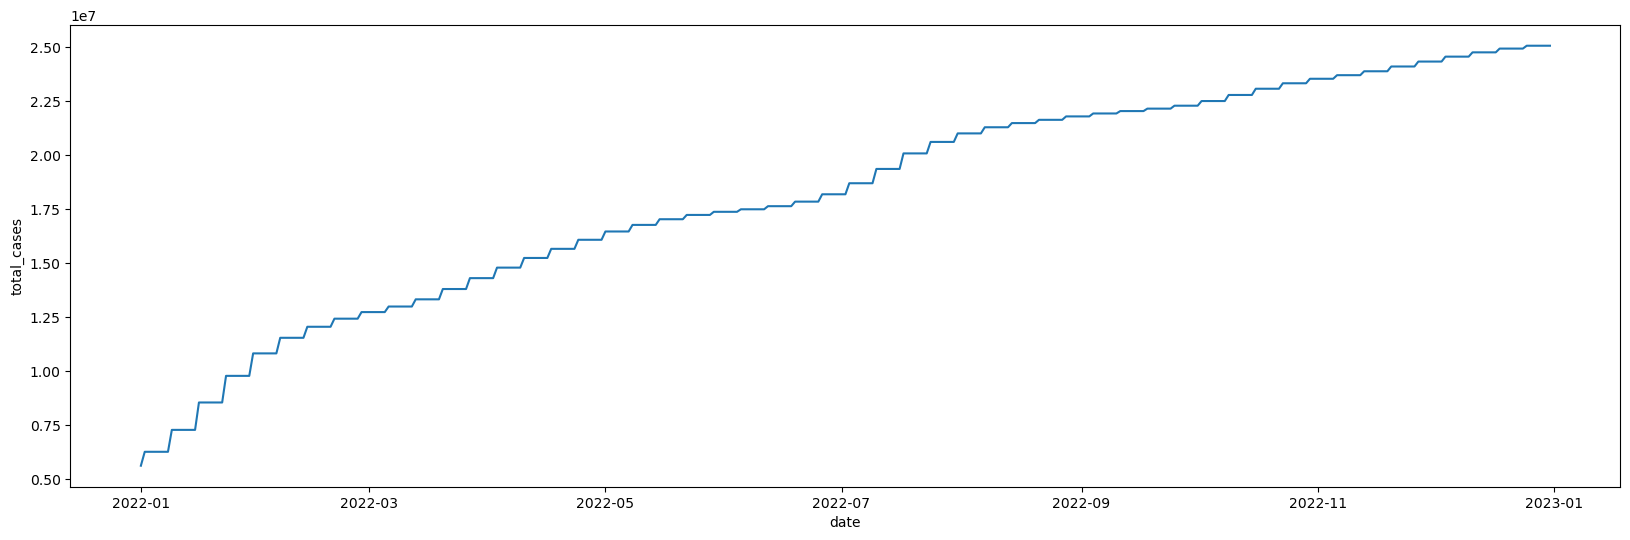

In [24]:
# GRAFICO CASI TOTALI ITALIA ANNO 2022
plt.figure(figsize=(20, 6))
sns.lineplot(data = italy, x = "date", y = "total_cases")

In [25]:
italy.new_cases.replace(0, np.nan, inplace=True)

C:\Users\matte\AppData\Local\Temp\ipykernel_9140\100403890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy.new_cases.replace(0, np.nan, inplace=True)


In [26]:
italy = italy.dropna(subset = "new_cases")

C:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='date', ylabel='new_cases'>

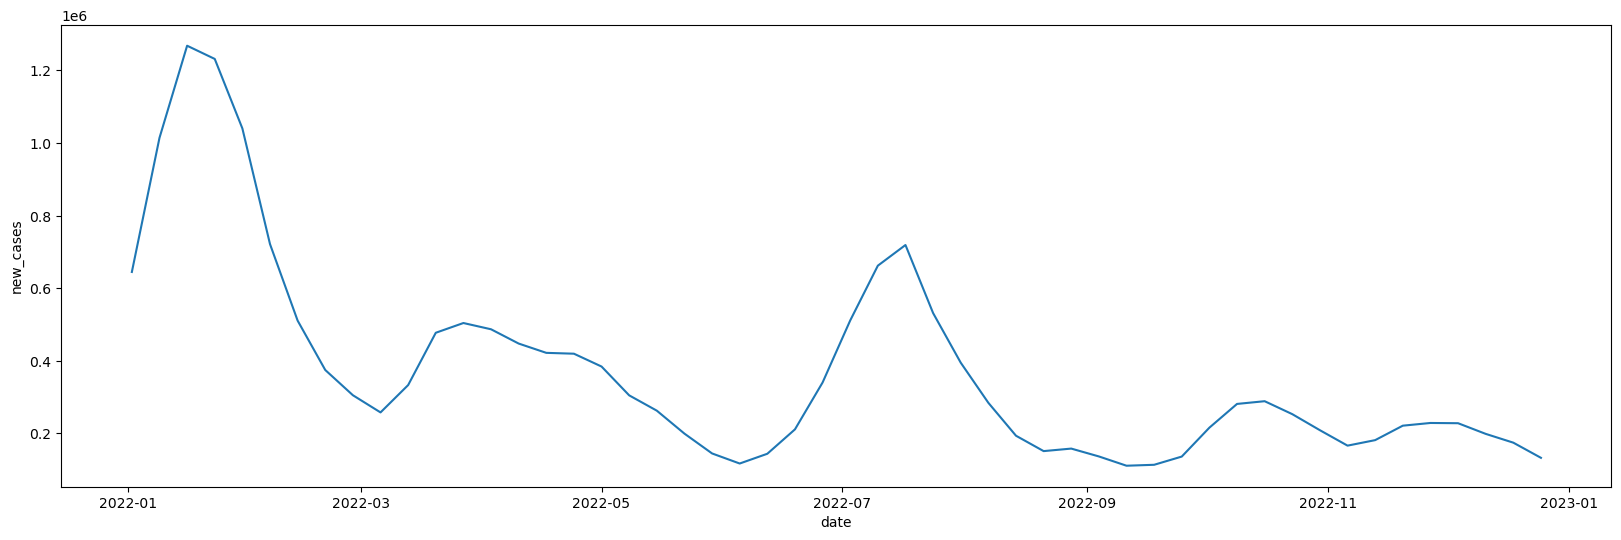

In [27]:
# ANDAMENTO NUOVI CASI IN ITALIA 2022
plt.figure(figsize=(20, 6))
sns.lineplot(data = italy, x = "date", y = "new_cases")

C:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='date', ylabel='new_cases'>

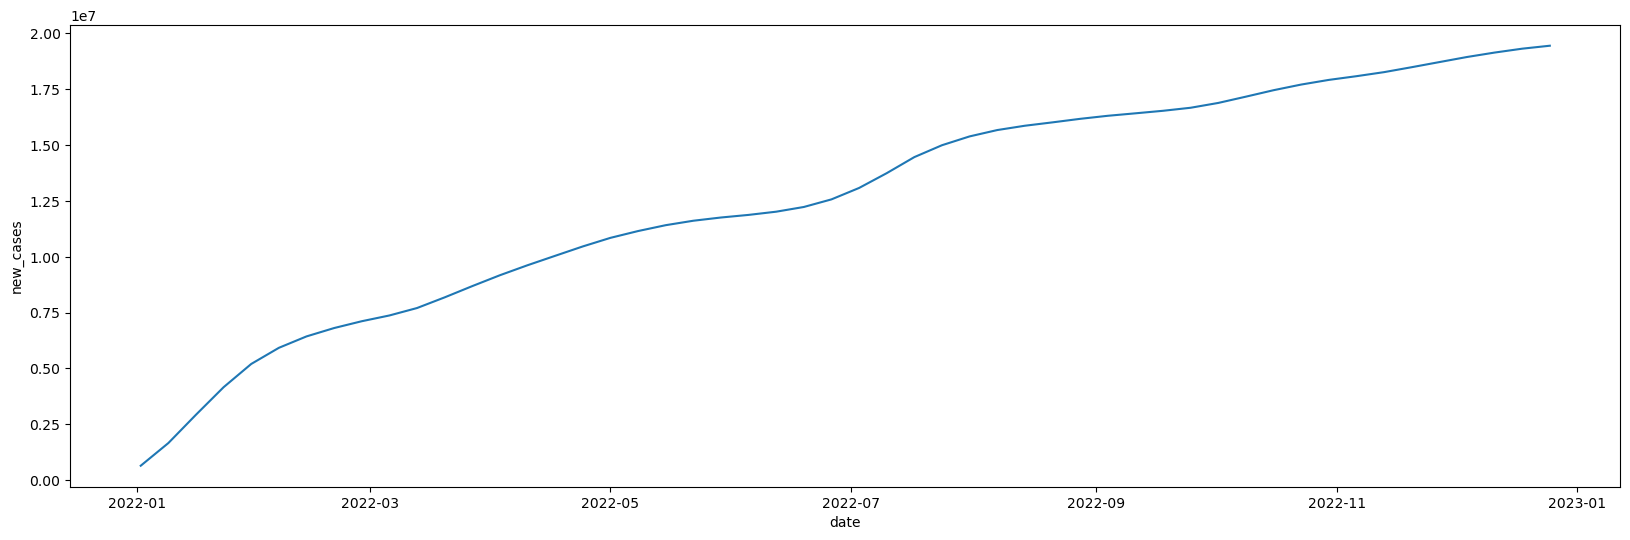

In [28]:
# Calcolare la somma cumulativa dei nuovi casi giornalieri
italy_somma = italy['new_cases'].cumsum()
plt.figure(figsize=(20, 6))
sns.lineplot(data=italy, x='date', y=italy_somma)
# i grafici sono uguali l'andamento è lo stesso

C:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

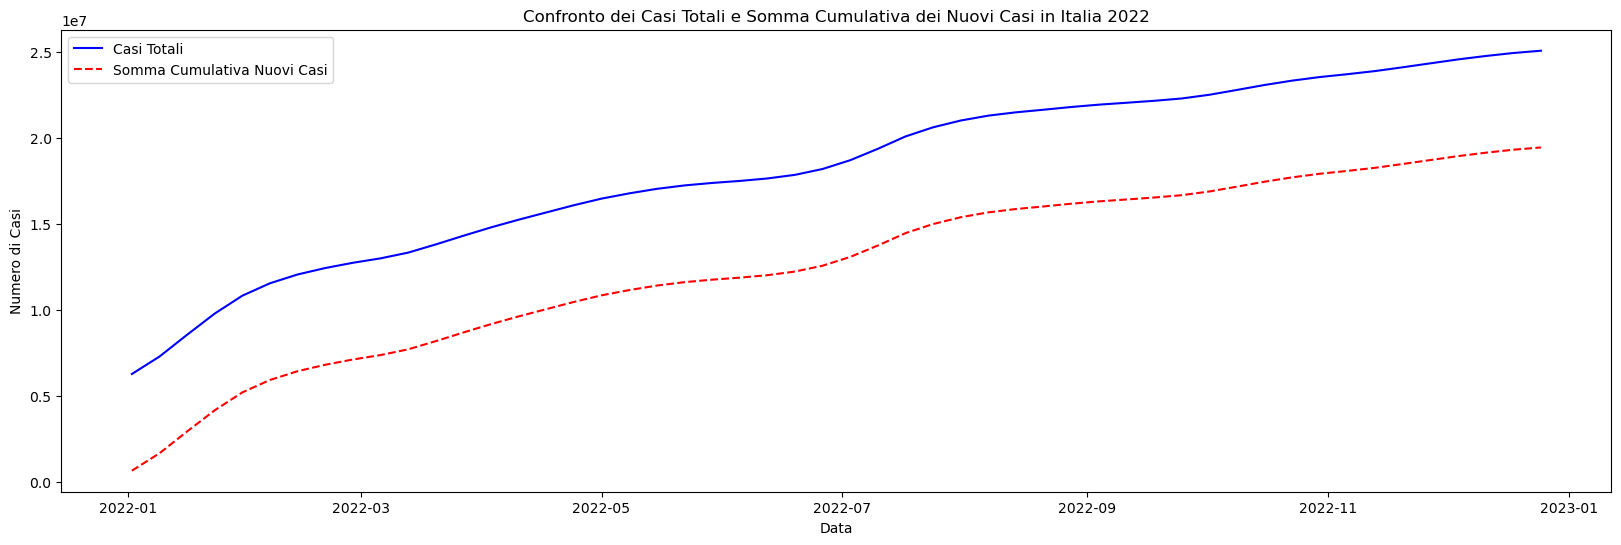

In [29]:
# CONFRONTO DETTAGLIATO NUOVI CASI E CASI TOTALI ITALIA 

# Imposta le dimensioni della figura
plt.figure(figsize=(20, 6))

# Traccia la prima plot line per i casi totali
sns.lineplot(data=italy, x="date", y="total_cases", label='Casi Totali', color='blue')

# Calcola la somma cumulativa dei nuovi casi giornalieri
italy_somma = italy['new_cases'].cumsum()

# Traccia la seconda plot line per la somma cumulativa dei nuovi casi
sns.lineplot(data=italy, x='date', y=italy_somma, label='Somma Cumulativa Nuovi Casi', color='red', linestyle='dashed')

# Etichetta gli assi e imposta il titolo
plt.xlabel('Data')
plt.ylabel('Numero di Casi')
plt.title('Confronto dei Casi Totali e Somma Cumulativa dei Nuovi Casi in Italia 2022')

# Mostra la legenda
plt.legend()


plt.show()


5 ) 
RIGUARDO LE NAZIONI DI ITALIA, GERMANIA E FRANCIA, MOSTRARE IN UN BOXPLOT LA DIFFERENZA TRA QUESTE NAZIONI RIGUARDO IL NUMERO DI PAZIENTI IN TERAPIA INTENSIVA (INTENSIVE CARE UNIT, ICU) DA MAGGIO 2022 (INCLUSO) AD APRILE 2023 (INCLUSO), E SCRIVERE UN BREVE COMMENTO A RIGUARDO




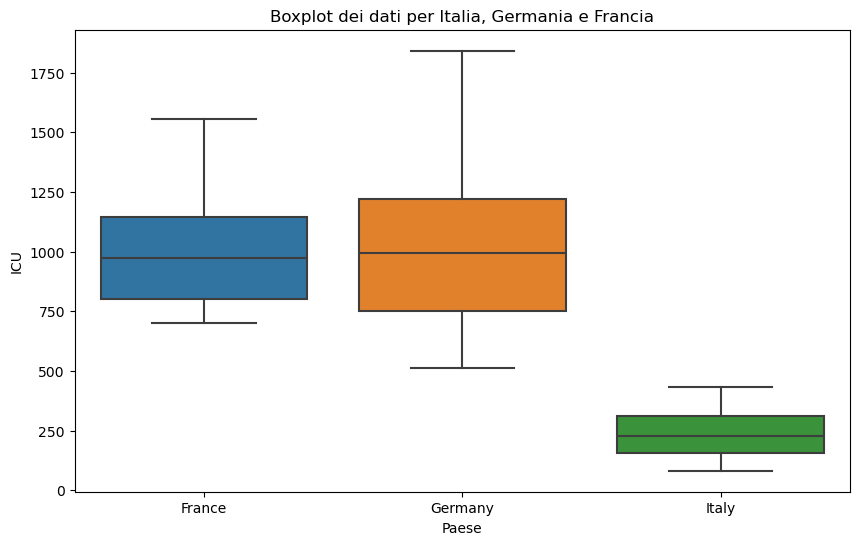

In [30]:
italia_germania_francia = df[df['location'].isin(['Italy', 'Germany', 'France'])]
italia_germania_francia = italia_germania_francia[(italia_germania_francia['date'] >= '2022-05-01') & (italia_germania_francia['date'] <= '2023-04-30')]
italia_germania_francia

plt.figure(figsize=(10, 6))  # Imposta la dimensione della figura
sns.boxplot(data=italia_germania_francia, x='location', y='icu_patients')  
plt.title('Boxplot dei dati per Italia, Germania e Francia')
plt.xlabel('Paese')
plt.ylabel('ICU') # Intensive Care Unit, ICU
plt.show()

In [31]:
italia_ = df[df['location'] == 'Italy']
italia_ = italia_[(italia_['date'] >= '2022-05-01') & (italia_['date'] <= '2023-04-30')]
italia_['icu_patients'].sum()


84408.0

In [32]:
germania_ = df[df['location'] == 'Germany']
germania_ = germania_[(germania_['date'] >= '2022-05-01') & (germania_['date'] <= '2023-04-30')]
germania_['icu_patients'].sum()

373171.0

In [33]:
f_ = df[df['location'] == 'France']
f_ = f_[(f_['date'] >= '2022-05-01') & (f_['date'] <= '2023-04-30')]
f_['icu_patients'].sum()

334457.0

6 ) 
RIGUARDO LE NAZIONI DI ITALIA, GERMANIA, FRANCIA E SPAGNA NEL 2023, MOSTRARE LA SOMMA DEI PAZIENTI OSPITALIZZATI PER OGNUNA — SE CI SONO DATI NULLI, SUGGERIRE SE PUÒ ESSERE POSSIBILE GESTIRLI TRAMITE SOSTITUZIONE O MENO.

In [34]:
italia_germania_francia_spagna_2023 = df[(df['location'].isin(['Italy', 'Germany', 'France', 'Spain'])) & (df['date'].dt.year == 2023)]
somma_ospitalizzati_per_nazione = italia_germania_francia_spagna_2023.groupby('location')['hosp_patients'].sum()
somma_ospitalizzati_per_nazione
# Germania ha solo valori nulli e non possiamo sostituirli con altri valori anche considerando le altre colonne del Dataset

location
France     1382574.0
Germany          0.0
Italy      1175272.0
Spain       354602.0
Name: hosp_patients, dtype: float64

In [35]:
# verifica valori nulli per la Germania
italia_germania_francia_spagna_2023[italia_germania_francia_spagna_2023.location=="Germany"]["hosp_patients"]

127369   NaN
127370   NaN
127371   NaN
127372   NaN
127373   NaN
          ..
127729   NaN
127730   NaN
127731   NaN
127732   NaN
127733   NaN
Name: hosp_patients, Length: 365, dtype: float64

POSSIBILITA' DI PRENDERE IN CONSIDERAZIONE LA COLONNA DEGLI OSPITALIZZATI SETTIMANALMENTE 

In [36]:

italia_germania_francia_spagna_2023[italia_germania_francia_spagna_2023.location=="Germany"]["weekly_hosp_admissions"].sum()

897776.0

In [37]:
italia_germania_francia_spagna_2023 = df[(df['location'].isin(['Italy', 'Germany', 'France', 'Spain'])) & (df['date'].dt.year == 2023)]
somma_ospitalizzati_ammessi_settimana = italia_germania_francia_spagna_2023.groupby('location')['weekly_hosp_admissions'].sum()
somma_ospitalizzati_ammessi_settimana

location
France     268117.0
Germany    897776.0
Italy      592019.0
Spain      299463.0
Name: weekly_hosp_admissions, dtype: float64